In [26]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

file = uproot.open("/data/jlai/iris-hep/output/tracksummary_ckf.root")
tree = file["tracksummary"]
tree.keys()

['event_nr',
 'track_nr',
 'nStates',
 'nMeasurements',
 'nOutliers',
 'nHoles',
 'nSharedHits',
 'chi2Sum',
 'NDF',
 'measurementChi2',
 'outlierChi2',
 'measurementVolume',
 'measurementLayer',
 'outlierVolume',
 'outlierLayer',
 'nMajorityHits',
 'majorityParticleId',
 'trackClassification',
 't_charge',
 't_time',
 't_vx',
 't_vy',
 't_vz',
 't_px',
 't_py',
 't_pz',
 't_theta',
 't_phi',
 't_eta',
 't_p',
 't_pT',
 't_d0',
 't_z0',
 't_prodR',
 'hasFittedParams',
 'eLOC0_fit',
 'eLOC1_fit',
 'ePHI_fit',
 'eTHETA_fit',
 'eQOP_fit',
 'eT_fit',
 'err_eLOC0_fit',
 'err_eLOC1_fit',
 'err_ePHI_fit',
 'err_eTHETA_fit',
 'err_eQOP_fit',
 'err_eT_fit',
 'res_eLOC0_fit',
 'res_eLOC1_fit',
 'res_ePHI_fit',
 'res_eTHETA_fit',
 'res_eQOP_fit',
 'res_eT_fit',
 'pull_eLOC0_fit',
 'pull_eLOC1_fit',
 'pull_ePHI_fit',
 'pull_eTHETA_fit',
 'pull_eQOP_fit',
 'pull_eT_fit',
 'cov_eLOC0_eLOC0',
 'cov_eLOC0_eLOC1',
 'cov_eLOC0_ePHI',
 'cov_eLOC0_eTHETA',
 'cov_eLOC0_eQOP',
 'cov_eLOC0_eT',
 'cov_eLOC1_e

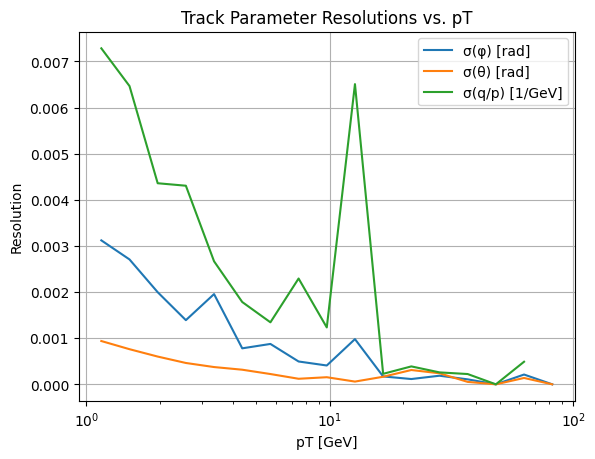

In [28]:
pt = ak.flatten(tree["t_pT"].arrays(library="ak")["t_pT"])
bin_edges = np.logspace(0, 2.2, 20)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
digitized = np.digitize(ak.to_numpy(pt), bin_edges)

residuals = {
    "σ(φ) [rad]": "res_ePHI_fit",
    "σ(θ) [rad]": "res_eTHETA_fit",
    # "σ(d₀) [mm]": "res_eLOC0_fit",
    # "σ(z₀) [mm]": "res_eLOC1_fit",
    "σ(q/p) [1/GeV]": "res_eQOP_fit"
}

for label, key in residuals.items():
    res = ak.flatten(tree[key].arrays(library="ak")[key])
    res_std = [ak.std(res[digitized == i]) for i in range(1, len(bin_edges))]
    plt.plot(bin_centers, res_std, label=label)

plt.xscale("log")
plt.xlabel("pT [GeV]")
plt.ylabel("Resolution")
plt.title("Track Parameter Resolutions vs. pT")
plt.grid(True)
plt.legend()
plt.show()


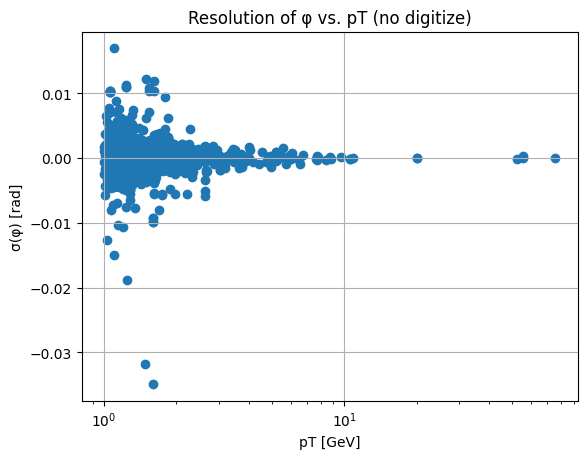

In [ ]:
pt = ak.flatten(tree["t_pT"].arrays(library="ak")["t_pT"])
res_phi = ak.flatten(tree["res_ePHI_fit"].arrays(library="ak")["res_ePHI_fit"])

plt.scatter(pt, res_phi)
plt.xscale("log")
plt.xlabel("pT [GeV]")
plt.ylabel("σ(φ) [rad]")
plt.title("Resolution of φ vs. pT (no digitize)")
plt.grid(True)
plt.show()

In [31]:
values = np.array([1.5, 2.2, 4.8, 6.0])
bins = np.array([0, 2, 4, 6])

digitized = np.digitize(values, bins)
print(digitized)

[1 2 3 4]
